# SMS Classification

+ https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/
+ https://towardsdatascience.com/naive-bayes-classifier-from-scratch-with-python-942708211470
+ https://scikit-learn.org/stable/modules/naive_bayes.html
+ https://pythonspot.com/nltk-stop-words/
+ https://www.youtube.com/watch?v=O2L2Uv9pdDA

In [5]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

import matplotlib.pyplot as plt
%matplotlib inline

## Data Import and Cleaning

__Source:__
https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

__Cleaning Process:__
1. Tokenize/Split messages
2. Remove unnecessary symbols
3. Stem word
4. 

In [2]:
data = pd.read_csv("./data/spam.csv", encoding="latin1")
data.drop(data.iloc[:, 2:], axis=1, inplace=True)
data["v1"].replace(to_replace="spam", value=1, inplace=True)
data["v1"].replace(to_replace="ham", value=0, inplace=True)

print(data)

      v1                                                 v2
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...
...   ..                                                ...
5567   1  This is the 2nd time we have tried 2 contact u...
5568   0              Will Ì_ b going to esplanade fr home?
5569   0  Pity, * was in mood for that. So...any other s...
5570   0  The guy did some bitching but I acted like i'd...
5571   0                         Rofl. Its true to its name

[5572 rows x 2 columns]


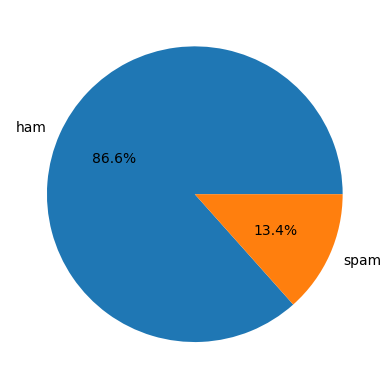

In [10]:
sizes = [data[data["v1"] == 0].shape[0]
        ,data[data["v1"] == 1].shape[0]
        ]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=["ham", "spam"], autopct='%1.1f%%')
plt.show()

In [16]:
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
# from nltk.stem.snowball import SnowballStemmer

punc = [',','.','?','!',';',':']
stem = PorterStemmer()
# stem = SnowballStemmer('english')

# Tokenize, filter, and stem an SMS message
def processSMS(sms: str) -> list:
    words = word_tokenize(sms)
    words = [stem.stem(w) for w in words if w[0] not in punc]
    return words

# print(data["v2"].iloc[0])
# print(processSMS(data["v2"].iloc[0]))

data["Vector"] = data["v2"].map(processSMS)
print(data["Vector"])

0       [go, until, jurong, point, crazi, avail, onli,...
1                            [ok, lar, joke, wif, u, oni]
2       [free, entri, in, 2, a, wkli, comp, to, win, f...
3       [u, dun, say, so, earli, hor, u, c, alreadi, t...
4       [nah, i, do, n't, think, he, goe, to, usf, he,...
                              ...                        
5567    [thi, is, the, 2nd, time, we, have, tri, 2, co...
5568            [will, ì_, b, go, to, esplanad, fr, home]
5569    [piti, *, wa, in, mood, for, that, so, ani, ot...
5570    [the, guy, did, some, bitch, but, i, act, like...
5571                       [rofl, it, true, to, it, name]
Name: Vector, Length: 5572, dtype: object


In [28]:
# Gather word statistics
stats = {}
for i in data.index:
    for w in data["Vector"][i]:
        e = [0,0]
        if stats.get(w) != None:
            e = stats[w]
        e[data["v1"][i]] += 1
        stats[w] = e